In [1]:
import pandas as pd

data = {
    'Name': ['Alice Smith', 'Bob Jones', 'Charlie Brown', 'Diana Prince'],
    'Age': [25, 45, 35, 28],
    'Salary': [50000, 80000, 62000, 52000],
    'JoinDate': ['2015-06-01', '2010-09-15', '2012-04-30', '2018-01-10'],
    'Department': ['HR', 'Engineering', 'Engineering', 'Marketing'],
}

df = pd.DataFrame(data)
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df


Name  Age  Salary   JoinDate   Department
0    Alice Smith   25   50000 2015-06-01           HR
1      Bob Jones   45   80000 2010-09-15  Engineering
2  Charlie Brown   35   62000 2012-04-30  Engineering
3   Diana Prince   28   52000 2018-01-10    Marketing

In [3]:
# –ò–¥–µ—è ‚Äî –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å—É—â–µ—Å—Ç–≤—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Å–æ–∑–¥–∞–≤–∞—Ç—å –Ω–æ–≤—ã–µ, –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã –¥–ª—è –º–æ–¥–µ–ª–∏.

from datetime import datetime

# –ö–æ–ª-–≤–æ –ª–µ—Ç —Ä–∞–±–æ—Ç—ã –≤ –∫–æ–º–ø–∞–Ω–∏–∏
df['YearsAtCompany'] = (pd.Timestamp('today') - df['JoinDate']).dt.days // 365

# –†–∞–∑–±–∏–≤–∫–∞ –∏–º–µ–Ω–∏ –Ω–∞ –ò–º—è –∏ –§–∞–º–∏–ª–∏—é
df['FirstName'] = df['Name'].apply(lambda x: x.split()[0])
df['LastName'] = df['Name'].apply(lambda x: x.split()[1])

# –ë–∏–Ω–∞—Ä–Ω—ã–π —Ñ–ª–∞–≥: –≤—ã—Å–æ–∫–∏–π –¥–æ—Ö–æ–¥
df['HighSalary'] = (df['Salary'] > 60000).astype(int)

# –í–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 100], labels=['Young', 'Mid', 'Senior'])

In [4]:
df

Name  Age  Salary   JoinDate   Department  YearsAtCompany  \
0    Alice Smith   25   50000 2015-06-01           HR              10   
1      Bob Jones   45   80000 2010-09-15  Engineering              14   
2  Charlie Brown   35   62000 2012-04-30  Engineering              13   
3   Diana Prince   28   52000 2018-01-10    Marketing               7   

  FirstName LastName  HighSalary AgeGroup  
0     Alice    Smith           0    Young  
1       Bob    Jones           1   Senior  
2   Charlie    Brown           1      Mid  
3     Diana   Prince           0    Young

In [5]:
# –£–¥–∞–ª–∏–º –∫–æ–ª–æ–Ω–∫—É 'Name', —Ç–∞–∫ –∫–∞–∫ –º—ã —É–∂–µ –∏–∑–≤–ª–µ–∫–ª–∏ FirstName –∏ LastName
df.drop(columns='Name', inplace=True)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ —á–∏—Å–ª–∞
df = pd.get_dummies(df, columns=['Department', 'AgeGroup'], drop_first=True)


Salary                  1.000000
Age                     0.993395
AgeGroup_Senior         0.923812
HighSalary              0.842152
YearsAtCompany          0.814903
AgeGroup_Mid            0.048622
Department_Marketing   -0.437595
Department_HR          -0.534838
Name: Salary, dtype: float64


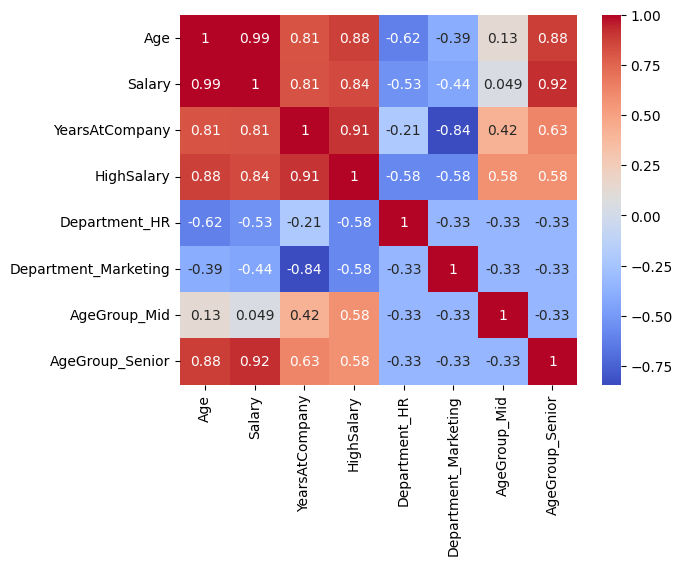

In [6]:
# –í—ã–±–∏—Ä–∞–µ–º –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ª–µ–∑–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. –°–ø–æ—Å–æ–±—ã:

# üîπ (–∞) –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è

print(df.corr(numeric_only=True)['Salary'].sort_values(ascending=False))

#üîπ (–±) –í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ / –≤–∞–∂–Ω–æ—Å—Ç—å (–µ—Å–ª–∏ –µ—Å—Ç—å –º–æ–¥–µ–ª—å)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

#üîπ (–≤) –£–¥–∞–ª–µ–Ω–∏–µ –Ω–∏–∑–∫–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏

# –£–¥–∞–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —É –≤—Å–µ—Ö
df = df.loc[:, df.nunique() > 1]

In [7]:
df

Age  Salary   JoinDate  YearsAtCompany FirstName LastName  HighSalary  \
0   25   50000 2015-06-01              10     Alice    Smith           0   
1   45   80000 2010-09-15              14       Bob    Jones           1   
2   35   62000 2012-04-30              13   Charlie    Brown           1   
3   28   52000 2018-01-10               7     Diana   Prince           0   

   Department_HR  Department_Marketing  AgeGroup_Mid  AgeGroup_Senior  
0           True                 False         False            False  
1          False                 False         False             True  
2          False                 False          True            False  
3          False                  True         False            False

## –¢–µ–ø–µ—Ä—å —É –Ω–∞—Å:
* –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (YearsAtCompany, HighSalary)
* –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ (Department_Engineering, –∏ —Ç.–¥.)
* —É–¥–∞–ª–µ–Ω—ã –ª–∏—à–Ω–∏–µ (Name)



In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [9]:
X, y = make_regression(n_samples=300, n_features=10, noise=0.2, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y


In [10]:
X = df.drop(columns='target')
y = df['target']

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_series)


Mutual Information Scores:
 feature_7    0.166397
feature_9    0.146176
feature_4    0.108402
feature_6    0.085898
feature_2    0.072890
feature_0    0.063758
feature_8    0.032652
feature_1    0.000000
feature_3    0.000000
feature_5    0.000000
dtype: float64


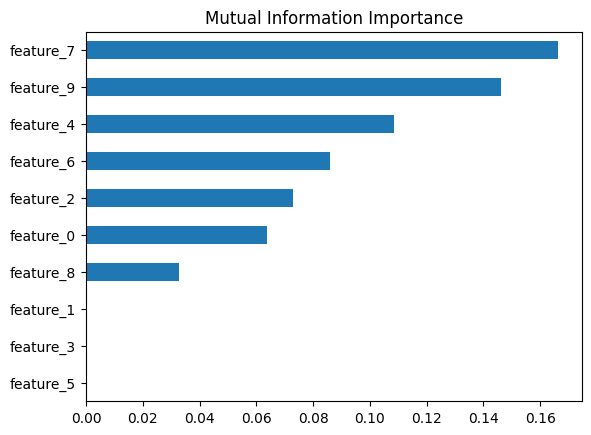

In [11]:
mi_series.plot(kind='barh', title="Mutual Information Importance")
plt.gca().invert_yaxis()
plt.show()


In [12]:
# –î–æ–ø—É—Å—Ç–∏–º, –º—ã —Ö–æ—Ç–∏–º –æ—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ k = 5 –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
top_k = 5
selected_features = mi_series.head(top_k).index.tolist()
X_selected = X[selected_features]


In [13]:
# RFE ‚Äî —ç—Ç–æ –∏—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —É–¥–∞–ª–µ–Ω–∏–µ –Ω–∞–∏–º–µ–Ω–µ–µ –≤–∞–∂–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. –†–µ–∞–ª–∏–∑—É–µ–º –µ–≥–æ –≤—Ä—É—á–Ω—É—é –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏):

def rfe_custom(X, y, estimator, min_features_to_select=1):
    remaining_features = list(X.columns)
    rankings = {}
    while len(remaining_features) > min_features_to_select:
        model = estimator.fit(X[remaining_features], y)
        coefs = np.abs(model.coef_)
        weakest_idx = np.argmin(coefs)
        weakest_feature = remaining_features[weakest_idx]
        rankings[weakest_feature] = len(remaining_features)
        print(f"Removing weakest feature: {weakest_feature}")
        remaining_features.pop(weakest_idx)
    for f in remaining_features:
        rankings[f] = 1
    return pd.Series(rankings).sort_values()


In [14]:
model = LinearRegression()
ranking = rfe_custom(X, y, model)
print("\nRFE Ranking (1=best):\n", ranking)


Removing weakest feature: feature_5
Removing weakest feature: feature_3
Removing weakest feature: feature_6
Removing weakest feature: feature_0
Removing weakest feature: feature_2
Removing weakest feature: feature_1
Removing weakest feature: feature_8
Removing weakest feature: feature_4
Removing weakest feature: feature_9

RFE Ranking (1=best):
 feature_7     1
feature_9     2
feature_4     3
feature_8     4
feature_1     5
feature_2     6
feature_0     7
feature_6     8
feature_3     9
feature_5    10
dtype: int64


In [15]:
best_features = ranking[ranking == 1].index.tolist()
X_final = X[best_features]
score = cross_val_score(model, X_final, y, cv=5, scoring='r2')
print("Cross-validated R¬≤:", np.mean(score))


Cross-validated R¬≤: 0.21486766132335466


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


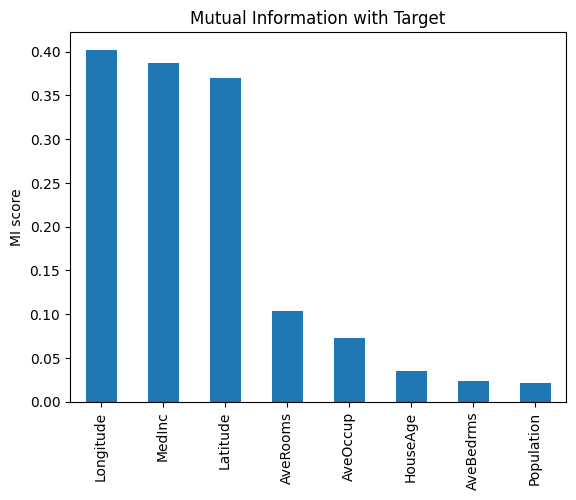

–£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫: AveOccup, R2 = 0.5541
–£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫: Population, R2 = 0.5550
–£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫: AveRooms, R2 = 0.5458
–£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫: AveBedrms, R2 = 0.5448
–£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫: HouseAge, R2 = 0.5331
–£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫: Longitude, R2 = 0.4200
–£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫: Latitude, R2 = 0.4214

–§–∏–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['MedInc']


In [16]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()

# –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
y = df['MedHouseVal']
X = df.drop(columns='MedHouseVal')

print(X.head())

from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# –û—Ü–µ–Ω–∏–º –≤–∑–∞–∏–º–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
mi = mutual_info_regression(X, y, discrete_features=False)

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

mi_series.plot(kind='bar', title='Mutual Information with Target')
plt.ylabel("MI score")
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# –ö–æ–ø–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏
X_selected = X.copy()

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –∏—Å—Ç–æ—Ä–∏—é
history = []

while X_selected.shape[1] > 1:
    scores = {}
    
    for col in X_selected.columns:
        X_temp = X_selected.drop(columns=col)
        score = cross_val_score(LinearRegression(), X_temp, y, cv=5, scoring='r2').mean()
        scores[col] = score

    # –ù–∞–π–¥–µ–º –ø—Ä–∏–∑–Ω–∞–∫, —É–¥–∞–ª–µ–Ω–∏–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ —É—Ö—É–¥—à–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ
    worst_feature = max(scores, key=scores.get)
    history.append((worst_feature, scores[worst_feature]))

    print(f"–£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫: {worst_feature}, R2 = {scores[worst_feature]:.4f}")
    X_selected.drop(columns=worst_feature, inplace=True)

print("\n–§–∏–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:", list(X_selected.columns))


In [17]:
from sklearn.feature_selection import f_regression

# F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∏ p-value
f_scores, p_values = f_regression(X, y)

f_result = pd.DataFrame({
    'Feature': X.columns,
    'F-score': f_scores,
    'p-value': p_values
}).sort_values('F-score', ascending=False)

print(f_result)


      Feature       F-score        p-value
0      MedInc  18556.571631   0.000000e+00
2    AveRooms    487.757462  7.569242e-107
6    Latitude    438.005453   2.939859e-96
1    HouseAge    232.841479   2.761861e-52
3   AveBedrms     45.108576   1.912589e-11
7   Longitude     43.698976   3.923322e-11
4  Population     12.547410   3.976308e-04
5    AveOccup     11.635342   6.483442e-04


 –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:

F-score ‚Äî —Å–∏–ª–∞ –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.

p-value ‚Äî —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å: —á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –ª—É—á—à–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, < 0.05).

      Feature  Importance       Std
6    Latitude    1.217200  0.028367
7   Longitude    1.142371  0.011464
0      MedInc    1.059750  0.019381
3   AveBedrms    0.232404  0.006401
2    AveRooms    0.207504  0.004250
1    HouseAge    0.022135  0.001778
5    AveOccup    0.000920  0.000095
4  Population    0.000010  0.000025


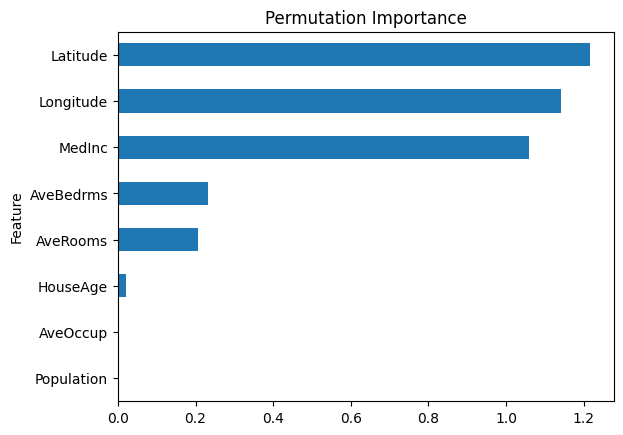

In [18]:
# Permutation Importance (–Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏)

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# –†–∞–∑–¥–µ–ª–∏–º –Ω–∞ train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# –ú–æ–¥–µ–ª—å
model = LinearRegression()
model.fit(X_train, y_train)

# –í–∞–∂–Ω–æ—Å—Ç—å —á–µ—Ä–µ–∑ –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–∫–∏
perm = permutation_importance(model, X_test, y_test, scoring='r2', n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm.importances_mean,
    'Std': perm.importances_std
}).sort_values('Importance', ascending=False)

print(perm_df)

perm_df.set_index('Feature')['Importance'].plot(kind='barh', title='Permutation Importance')
plt.gca().invert_yaxis()
plt.show()

### 3. –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –º–∞–ª–æ–∑–Ω–∞—á–∏–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ 'other'
#### –ò–¥–µ—è: –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –Ω–∏–∂–µ –ø–æ—Ä–æ–≥–∞ ‚Äî –æ–±—ä–µ–¥–∏–Ω–∏–º –≤ –æ–¥–∏–Ω –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 'other'.

–ü—Ä–∏–º–µ—Ä (–∏—Å–ø–æ–ª—å–∑—É–µ–º mutual_info):


In [19]:
threshold = 0.02  # –≤—ã–±–∏—Ä–∞–µ–º –ø–æ—Ä–æ–≥ –≤—Ä—É—á–Ω—É—é –∏–ª–∏ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ñ–∏—á

# –í–∞–∂–Ω—ã–µ –∏ —Å–ª–∞–±—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
important_features = mi_series[mi_series >= threshold].index.tolist()
weak_features = mi_series[mi_series < threshold].index.tolist()

print("–í–∞–∂–Ω—ã–µ:", important_features)
print("–û–±—ä–µ–¥–∏–Ω—ë–Ω–Ω—ã–µ –≤ 'other':", weak_features)

# –°–æ–∑–¥–∞–µ–º –±–∏–Ω–∞—Ä–Ω—ã–π –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä –Ω–∞–ª–∏—á–∏—è —Å–ª–∞–±–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
X_transformed = X[important_features].copy()
X_transformed['other'] = X[weak_features].mean(axis=1)


–í–∞–∂–Ω—ã–µ: ['Longitude', 'MedInc', 'Latitude', 'AveRooms', 'AveOccup', 'HouseAge', 'AveBedrms', 'Population']
–û–±—ä–µ–¥–∏–Ω—ë–Ω–Ω—ã–µ –≤ 'other': []


## 4. K-–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ (k-binning)
#### –ü—É—Å—Ç—å —É –Ω–∞—Å –µ—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, mi_series):

In [20]:

from sklearn.preprocessing import KBinsDiscretizer

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤–∞–∂–Ω–æ—Å—Ç–∏ –≤ –º–∞—Å—Å–∏–≤
importance_values = mi_series.values.reshape(-1, 1)

# K-–±–∏–Ω–Ω–∏–Ω–≥ –Ω–∞ 3 –≥—Ä—É–ø–ø—ã (–Ω–∏–∑–∫–∞—è, —Å—Ä–µ–¥–Ω—è—è, –≤—ã—Å–æ–∫–∞—è –≤–∞–∂–Ω–æ—Å—Ç—å)
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
groups = kbin.fit_transform(importance_values).astype(int).flatten()

# –°–æ–∑–¥–∞–¥–∏–º DataFrame —Å –≥—Ä—É–ø–ø–∞–º–∏
grouped_features = pd.DataFrame({
    'Feature': mi_series.index,
    'MI': mi_series.values,
    'Group': groups
}).sort_values('Group')

print(grouped_features)

      Feature        MI  Group
5    HouseAge  0.035586      0
6   AveBedrms  0.023900      0
7  Population  0.021215      0
3    AveRooms  0.103384      1
4    AveOccup  0.072412      1
0   Longitude  0.402184      2
1      MedInc  0.387251      2
2    Latitude  0.369270      2


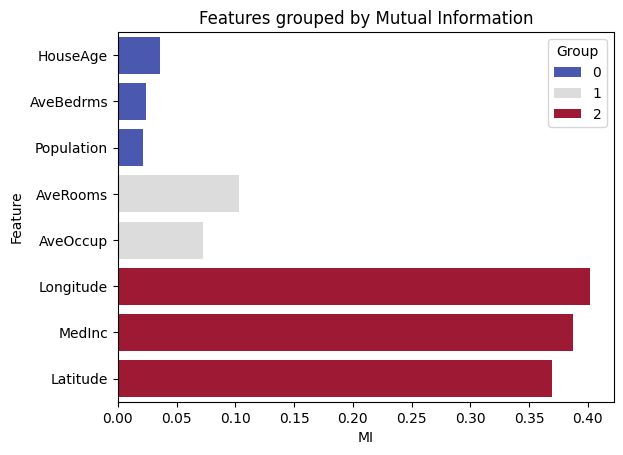

In [21]:
import seaborn as sns

sns.barplot(x='MI', y='Feature', hue='Group', data=grouped_features, dodge=False, palette='coolwarm')
plt.title("Features grouped by Mutual Information")
plt.show()


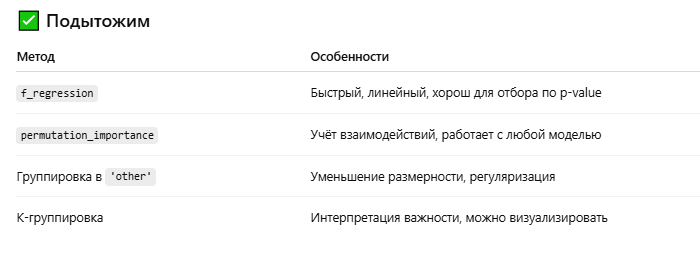

In [22]:
from IPython.display import Image
Image('summary.png')

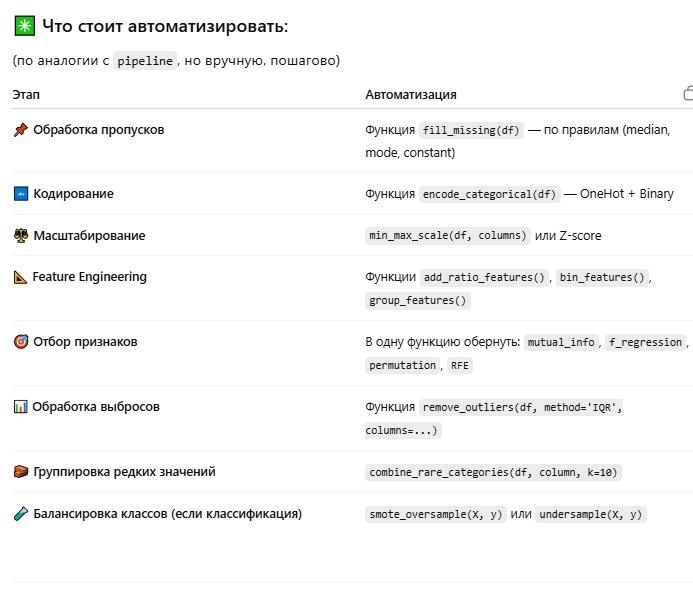

In [23]:
Image('auto.png')

# –ü—Ä–∏–º–µ—Ä –Ω–∞ –∫–∞–ª–∏—Ñ–æ—Ä–Ω–∏—è —Ö–∞—É–∑–∏–Ω–≥

In [24]:
#  1. –ò–º–ø–æ—Ä—Ç –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# –ó–∞–≥—Ä—É–∑–∫–∞
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
X, y = df.drop(columns='MedHouseVal'), df['MedHouseVal']


In [33]:
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [38]:
def add_features(X):
    X = X.copy()
    X['RoomsPerHousehold'] = X['AveRooms'] / X['HouseAge']
    X['BedroomsPerRoom'] = X['AveBedrms'] / X['AveRooms']
    X['PopulationPerHousehold'] = X['Population'] / X['HouseAge']
    return X


In [26]:
def scale_features(X):
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X_scaled


In [27]:
def f_regression_selection(X, y, top_k=5):
    f_vals, p_vals = f_regression(X, y)
    selected = X.columns[np.argsort(f_vals)[-top_k:]]
    return selected.tolist()


In [28]:
def permutation_selection(X, y, top_k=5):
    model = RandomForestRegressor(n_estimators=50, random_state=42)
    model.fit(X, y)
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    importances = result.importances_mean
    selected = X.columns[np.argsort(importances)[-top_k:]]
    return selected.tolist()


In [29]:
def full_pipeline(X, y, k=5):
    # 1. Feature Engineering
    X_new = add_features(X)
    
    # 2. –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
    X_scaled = scale_features(X_new)

    # 3. –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    f_selected = f_regression_selection(X_scaled, y, top_k=k)
    perm_selected = permutation_selection(X_scaled, y, top_k=k)

    # 4. –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –∏ —É–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
    selected_features = list(set(f_selected + perm_selected))
    
    return X_scaled[selected_features], selected_features


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_processed, selected_cols = full_pipeline(X_train, y_train, k=5)
print("–í—ã–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:", selected_cols)
print("–†–∞–∑–º–µ—Ä –∏—Ç–æ–≥–æ–≤–æ–π –º–∞—Ç—Ä–∏—Ü—ã:", X_processed.shape)



–í—ã–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['Longitude', 'AveOccup', 'AveRooms', 'BedroomsPerRoom', 'HouseAge', 'RoomsPerHousehold', 'Latitude', 'MedInc']
–†–∞–∑–º–µ—Ä –∏—Ç–æ–≥–æ–≤–æ–π –º–∞—Ç—Ä–∏—Ü—ã: (16512, 8)


–¢–µ–ø–µ—Ä—å —Å—Ä–∞–≤–Ω–∏–º —Å —Å–∫–ª–µ—Ä–Ω

In [40]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# –î–æ–±–∞–≤–∏–º –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω—ã–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
X['Region'] = pd.cut(X['Latitude'], bins=3, labels=['North', 'Center', 'South'])

# 2. –î–µ–ª–∏–º –Ω–∞ train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. –£–∫–∞–∑—ã–≤–∞–µ–º —Ç–∏–ø—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
num_features = X.select_dtypes(include=np.number).columns.tolist()
cat_features = ['Region']

# 4. –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–æ—Ä—ã
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

# 5. –û–±—â–∏–π –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–æ—Ä
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

# 6. –ü–∞–π–ø–ª–∞–π–Ω Ridge
ridge_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_regression, k=8)),
    ("regressor", Ridge(alpha=1.0))
])

# 7. –û–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞ Ridge
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# 8. –ü–∞–π–ø–ª–∞–π–Ω LGBM
lgbm_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_regression, k=8)),
    ("regressor", LGBMRegressor(n_estimators=100, random_state=42))
])

# 9. –û–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞ LGBM
lgbm_pipeline.fit(X_train, y_train)
y_pred_lgbm = lgbm_pipeline.predict(X_test)
print("LGBM R2:", r2_score(y_test, y_pred_lgbm))
print("LGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))


Ridge R2: 0.5785128844294547
Ridge RMSE: 0.7431826830978385
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
LGBM R2: 0.8178111848629579
LGBM RMSE: 0.48861217656813616


–ò –ø–æ—Å–ª–µ–¥–Ω—è—è —Ç–µ–º–∞ - –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

–ö–æ–≥–¥–∞ –æ–¥–∏–Ω –∫–ª–∞—Å—Å –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —á–∞—â–µ –¥—Ä—É–≥–æ–≥–æ, –º–æ–¥–µ–ª—å —Å–∫–ª–æ–Ω–Ω–∞ "–∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞—Ç—å" —Ä–µ–¥–∫–∏–π –∫–ª–∞—Å—Å. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤ –∑–∞–¥–∞—á–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞:

98% —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π ‚Äî –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ

2% ‚Äî –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏–µ

–ú–æ–¥–µ–ª—å, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—â–∞—è "–Ω–æ—Ä–º–∞–ª—å–Ω–æ" –≤—Å–µ–≥–¥–∞, –±—É–¥–µ—Ç –∏–º–µ—Ç—å 98% accuracy, –Ω–æ –ø–æ–ª–Ω–æ—Å—Ç—å—é –±–µ—Å–ø–æ–ª–µ–∑–Ω–∞.



## 1. Undersampling
#### –°—É—Ç—å: —É–º–µ–Ω—å—à–µ–Ω–∏–µ —á–∏—Å–ª–∞ –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–∑ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∞.

**–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞** :
* –ü—Ä–æ—Å—Ç–æ—Ç–∞, –±—ã—Å—Ç—Ä–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞.
* –ü–æ–º–æ–≥–∞–µ—Ç —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –≤—ã–±–æ—Ä–∫—É.

**–ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏**:
* –ü–æ—Ç–µ—Ä—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ (–≤—ã–∫–∏–¥—ã–≤–∞—é—Ç—Å—è –¥–∞–Ω–Ω—ã–µ).
* –ú–æ–∂–µ—Ç –Ω–µ–¥–æ–æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å.

In [ ]:
from sklearn.utils import resample

df_majority = df[df.target == 0]
df_minority = df[df.target == 1]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])


## 2. Oversampling
#### –°—É—Ç—å: —É–≤–µ–ª–∏—á–µ–Ω–∏–µ —á–∏—Å–ª–∞ –æ–±—ä–µ–∫—Ç–æ–≤ –∏–∑ –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤–∞.

**–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞**:
* –ù–µ —Ç–µ—Ä—è—é—Ç—Å—è –¥–∞–Ω–Ω—ã–µ.
* –†–∞–±–æ—Ç–∞–µ—Ç, –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã—Ö –º–∞–ª–æ.

**–ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏**:
* –í–æ–∑–º–æ–∂–µ–Ω overfitting (–º–æ–¥–µ–ª—å "–∑–∞–ø–æ–º–∏–Ω–∞–µ—Ç" –¥—É–±–ª–∏–∫–∞—Ç—ã).
* –ú–æ–∂–µ—Ç —É—Ö—É–¥—à–∏—Ç—å –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å.

In [ ]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_minority_upsampled, df_majority])


## 3. SMOTE (Synthetic Minority Over-sampling Technique)
#### –°—É—Ç—å: –≤–º–µ—Å—Ç–æ –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏—è —Å–æ–∑–¥–∞—ë—Ç —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –æ–±—ä–µ–∫—Ç—ã –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏ –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤–∞.

**–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞**:
* –ú–µ–Ω—å—à–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è, —á–µ–º —É oversampling.
* –ë–æ–ª—å—à–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è –≤ –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤–µ.

**–ù–µ–¥–æ—Å—Ç–∞—Ç–∫–∏**:
* –†–∞–±–æ—Ç–∞–µ—Ç —Ç–æ–ª—å–∫–æ —Å —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏.
* –ú–æ–∂–µ—Ç –¥–æ–±–∞–≤–ª—è—Ç—å —à—É–º.

In [ ]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

## 4. –í–∑–≤–µ—à–∏–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ (class_weight)
#### –°—É—Ç—å: –º–æ–¥–µ–ª–∏ —à—Ç—Ä–∞—Ñ—É—é—Ç —Å–µ–±—è –∑–∞ –æ—à–∏–±–∫—É –Ω–∞ –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤–µ —Å–∏–ª—å–Ω–µ–µ, —á–µ–º –Ω–∞ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ.

–ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è –≤:
LogisticRegression, RandomForest, XGBoost, LGBM, SVC, RidgeClassifier, –∏ –¥—Ä.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

# –ú–æ–∂–Ω–æ –∑–∞–¥–∞—Ç—å –≤—Ä—É—á–Ω—É—é:

model = LogisticRegression(class_weight={0:1, 1:10})

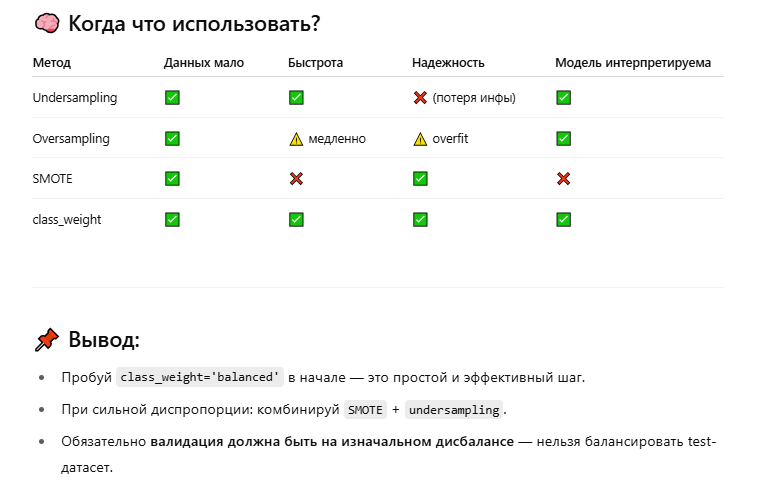

In [42]:
Image('use.png')

–ò –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ

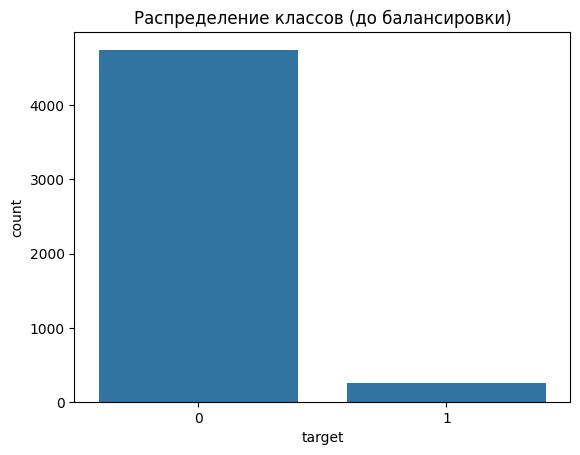

In [43]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# –°–æ–∑–¥–∞–µ–º —Å–∏–ª—å–Ω–æ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç
X, y = make_classification(n_samples=5000, n_features=10, n_informative=6, 
                           n_redundant=2, n_clusters_per_class=1,
                           weights=[0.95, 0.05], flip_y=0,
                           random_state=42)

df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df["target"] = y

# –ü—Ä–æ–≤–µ—Ä–∏–º –¥–∏—Å–±–∞–ª–∞–Ω—Å
sns.countplot(x="target", data=df)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ (–¥–æ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏)")
plt.show()


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1188
           1       0.84      0.58      0.69        62

    accuracy                           0.97      1250
   macro avg       0.91      0.79      0.84      1250
weighted avg       0.97      0.97      0.97      1250



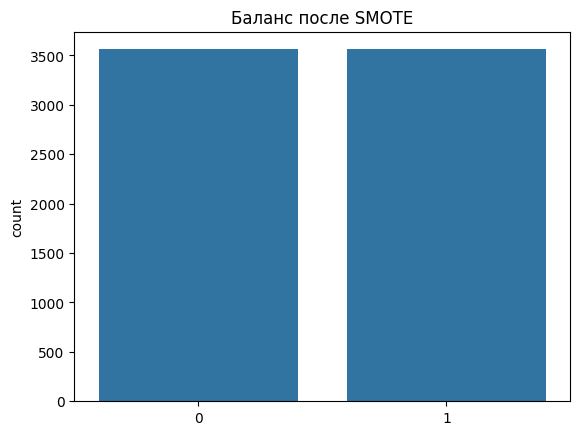

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1188
           1       0.27      0.94      0.42        62

    accuracy                           0.87      1250
   macro avg       0.63      0.90      0.67      1250
weighted avg       0.96      0.87      0.90      1250



In [45]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–æ–≤—ã–π –±–∞–ª–∞–Ω—Å
sns.countplot(x=y_resampled)
plt.title("–ë–∞–ª–∞–Ω—Å –ø–æ—Å–ª–µ SMOTE")
plt.show()

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –∑–∞–Ω–æ–≤–æ
model.fit(X_resampled, y_resampled)
y_pred_smote = model.predict(X_test)
print(classification_report(y_test, y_pred_smote))


In [46]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

# –û–±—É—á–∏–º –∑–∞–Ω–æ–≤–æ
model.fit(X_under, y_under)
y_pred_under = model.predict(X_test)
print(classification_report(y_test, y_pred_under))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1188
           1       0.25      0.95      0.40        62

    accuracy                           0.86      1250
   macro avg       0.63      0.90      0.66      1250
weighted avg       0.96      0.86      0.89      1250



In [47]:
model_weighted = LogisticRegression(class_weight={0: 1, 1: 20}, max_iter=1000)
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)
print(classification_report(y_test, y_pred_weighted))


              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1188
           1       0.26      0.95      0.41        62

    accuracy                           0.87      1250
   macro avg       0.63      0.91      0.67      1250
weighted avg       0.96      0.87      0.90      1250



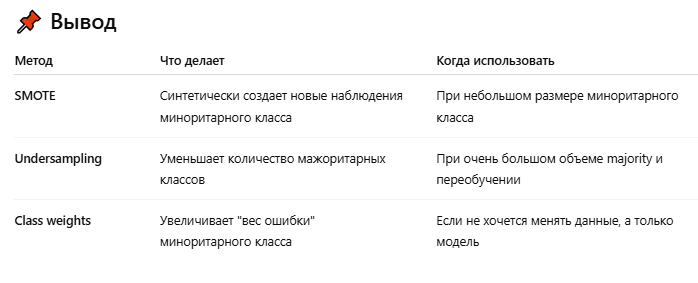

In [48]:
Image('—Å—â—Ç—Å.png')

In [49]:
from sklearn.datasets import make_classification
import pandas as pd
from collections import Counter

X, y = make_classification(
    n_samples=5000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    weights=[0.9, 0.1],
    flip_y=0.01,
    random_state=42
)

print(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤: {Counter(y)}")



–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤: Counter({0: 4479, 1: 521})


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

clf_base = RandomForestClassifier(random_state=42)
clf_base.fit(X_train, y_train)
y_pred_base = clf_base.predict(X_test)
print("üîπ –ë–µ–∑ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏")
print(classification_report(y_test, y_pred_base, digits=3))


üîπ –ë–µ–∑ –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏
              precision    recall  f1-score   support

           0      0.948     0.999     0.973      1344
           1      0.976     0.532     0.689       156

    accuracy                          0.950      1500
   macro avg      0.962     0.765     0.831      1500
weighted avg      0.951     0.950     0.943      1500



In [51]:
clf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_weighted.fit(X_train, y_train)
y_pred_weighted = clf_weighted.predict(X_test)
print("üîπ Class Weight = 'balanced'")
print(classification_report(y_test, y_pred_weighted, digits=3))


üîπ Class Weight = 'balanced'
              precision    recall  f1-score   support

           0      0.946     0.999     0.971      1344
           1      0.975     0.506     0.667       156

    accuracy                          0.947      1500
   macro avg      0.961     0.752     0.819      1500
weighted avg      0.949     0.947     0.940      1500



In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_train_sm, y_train_sm)
y_pred_sm = clf_smote.predict(X_test)
print("üîπ SMOTE Oversampling")
print(classification_report(y_test, y_pred_sm, digits=3))


üîπ SMOTE Oversampling
              precision    recall  f1-score   support

           0      0.968     0.991     0.979      1344
           1      0.903     0.718     0.800       156

    accuracy                          0.963      1500
   macro avg      0.936     0.855     0.890      1500
weighted avg      0.961     0.963     0.961      1500



In [53]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

clf_rus = RandomForestClassifier(random_state=42)
clf_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = clf_rus.predict(X_test)
print("üîπ Random Undersampling")
print(classification_report(y_test, y_pred_rus, digits=3))


üîπ Random Undersampling
              precision    recall  f1-score   support

           0      0.980     0.923     0.951      1344
           1      0.560     0.840     0.672       156

    accuracy                          0.915      1500
   macro avg      0.770     0.882     0.811      1500
weighted avg      0.937     0.915     0.922      1500



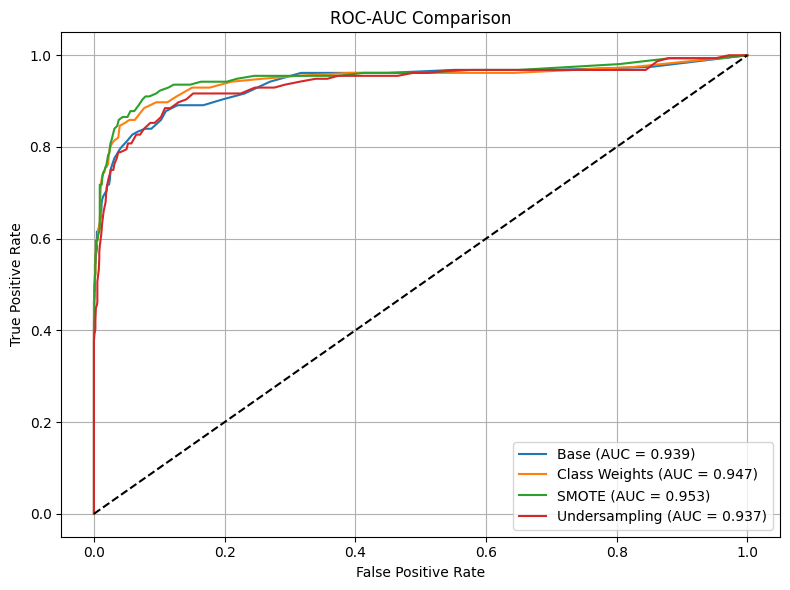

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(model, X_test, y_test, label):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.3f})')

plt.figure(figsize=(8,6))
plot_roc(clf_base, X_test, y_test, "Base")
plot_roc(clf_weighted, X_test, y_test, "Class Weights")
plot_roc(clf_smote, X_test, y_test, "SMOTE")
plot_roc(clf_rus, X_test, y_test, "Undersampling")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-AUC Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
